In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

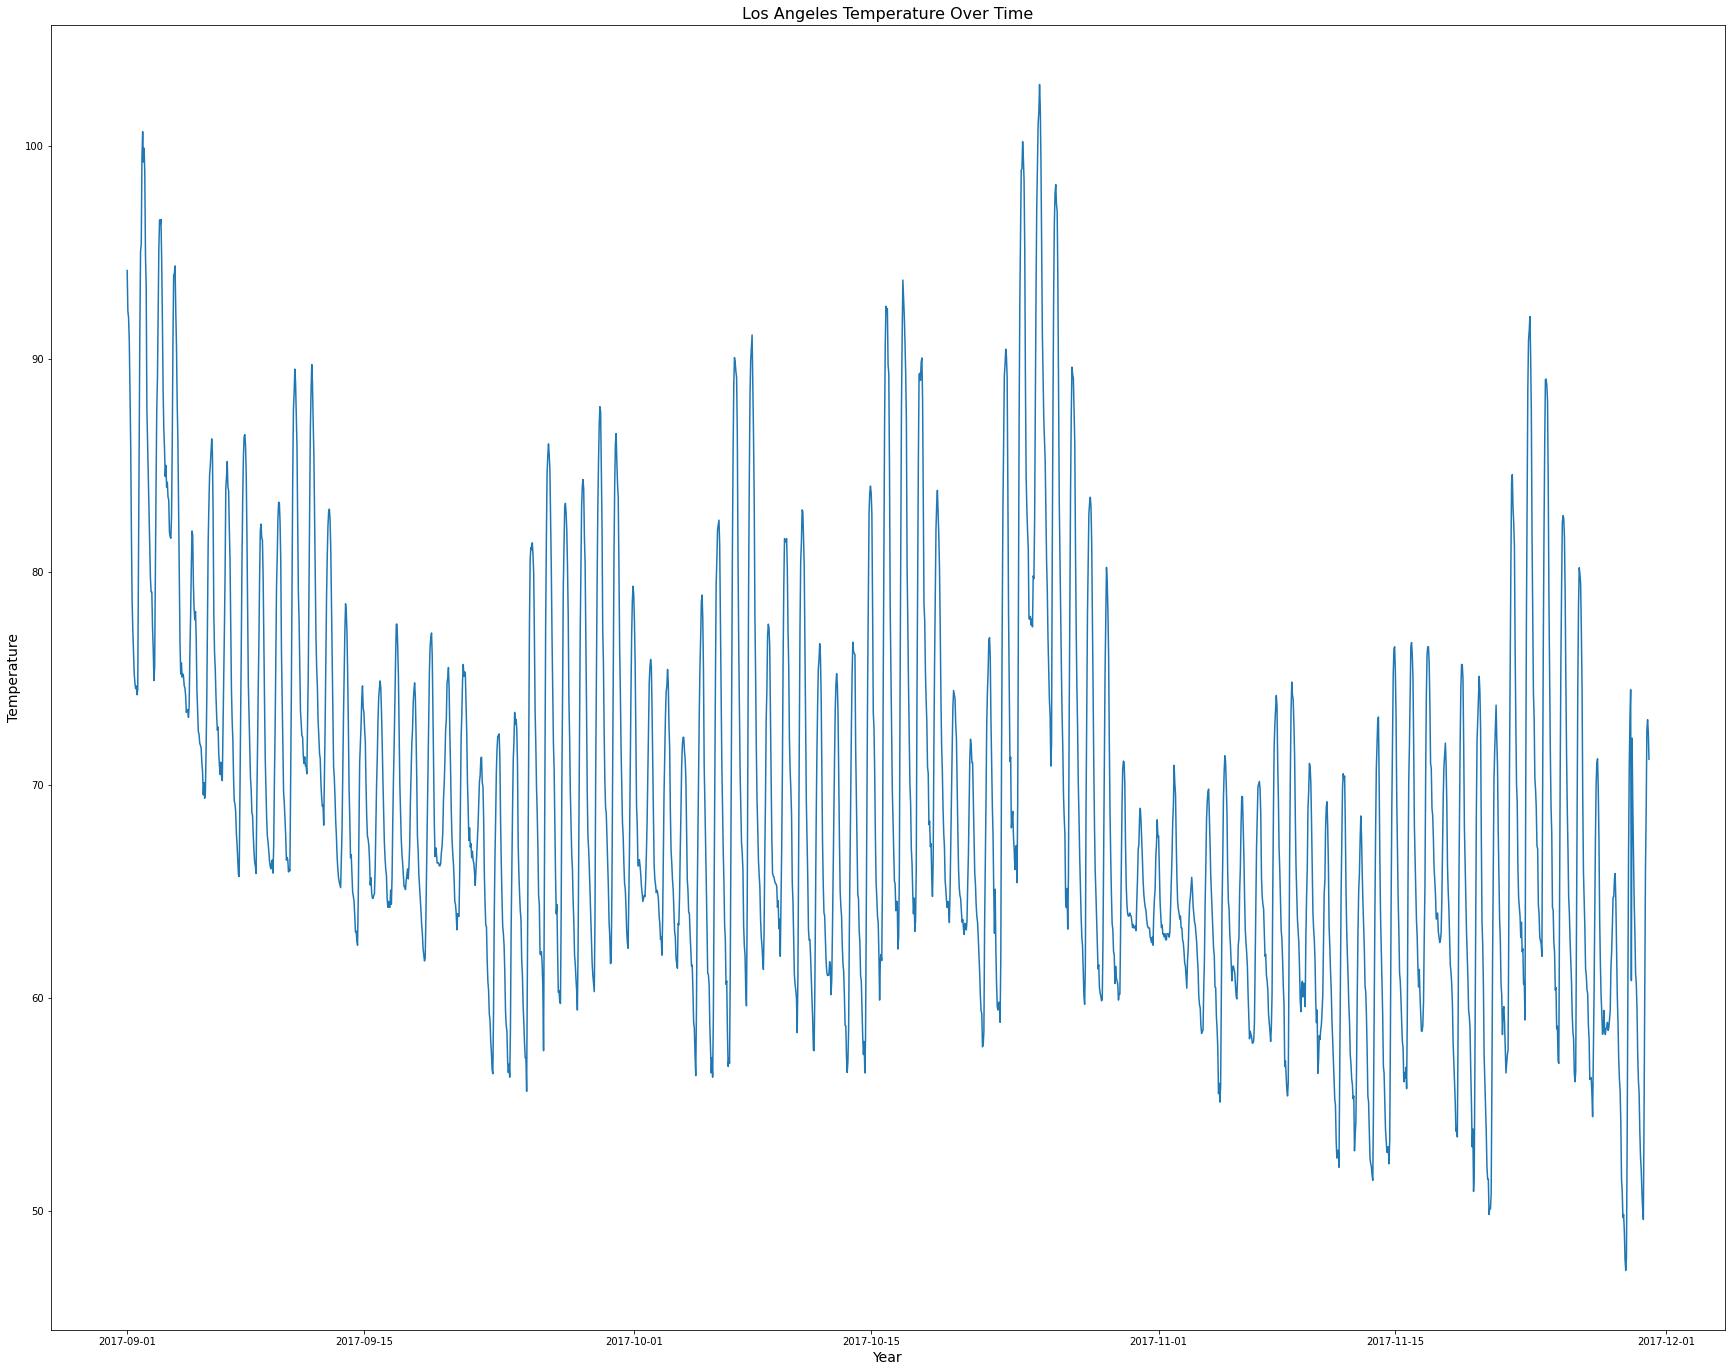

In [20]:
df = pd.read_csv('LosAngelesTempData.csv')

def convertKtoF(x):
    x = (x-273.15) * (9/5) +32
    return float(x)

df ['datetime'] = pd.to_datetime(df ['datetime'])
df ['temperature'] = df['temperature'].apply(convertKtoF)


plt.figure(figsize=(30,24))
plt.plot(df['datetime'], df['temperature'])
plt.title('Los Angeles Temperature Over Time', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Temperature', size=14)
plt.show()

df['Month'] = df['datetime'].dt.month
df['Year'] = df['datetime'].dt.year
df['Day'] = df['datetime'].dt.day
df['Hour'] = df['datetime'].dt.hour

In [21]:
targetVar = df['temperature']
features = df[['humidity', 'pressure','windspeed','Month']]

userHumidity = input("Enter humidity value (as a percentage):")
userPressure = input("Enter pressure value (in hectoPascal between 1000 - 1200):")
userWindspeed = input("Enter windspeed value (in m/s between 0-5):")
userMonth = input("Enter which month (as a number 1-12):")

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(features, targetVar)
predictedTemp = regr.predict([[int(userHumidity), int(userPressure), int(userWindspeed), int(userMonth)]])
print("The predicted temperature given these conditions is: " + str(predictedTemp))

The predicted temperature given these conditions is: [59.21469908]


c:\Users\Carrie Lei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
